In [3]:
#Importing Required Libraries
!pip install cryptocompare
!pip install arch
!pip install yfinance
!pip install statsmodels
!pip install pandas

  Preparing metadata (setup.py) ... done
  Created wheel for cryptocompare: filename=cryptocompare-0.7.6-py3-none-any.whl size=6290 sha256=b94d6856e6250a7de1c9f270d233ace4a4e1b9a5075a0437f7bff9760207bb01
  Stored in directory: /root/.cache/pip/wheels/97/81/6a/261bc499b9d9bf8b391eea52c90a4746b477539564b0a66c94
Successfully built cryptocompare
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 24.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import yfinance as yf
import cryptocompare
import statsmodels.api as sm
import requests
from datetime import datetime
from pandas_datareader import data as pdr
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import (
    norm,
    kurtosis,
    skew,
    spearmanr,
    kendalltau,
    probplot,
    anderson,
    kstest,
)
from scipy.stats import jarque_bera
import arch
from arch import arch_model

In [5]:
#Importing Bitcoin Price from Yahoo Finance
start_date = '2023-02-28'
end_date = '2023-06-01'
ticker1 = ['BTC-USD']
ticker2 = ['ETH-USD']
ticker3 = ['XRP-USD']

yf.pdr_override()
btc = pdr.get_data_yahoo(ticker1, start=start_date, end=end_date)
eth = pdr.get_data_yahoo(ticker2, start=start_date, end=end_date)
xrp = pdr.get_data_yahoo(ticker3, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
#Displaying the first 5 rows of the data
print(btc.head())

                    Open          High           Low         Close  \
Date                                                                 
2023-02-28  23521.837891  23585.384766  23077.650391  23147.353516   
2023-03-01  23150.929688  23880.632812  23088.626953  23646.550781   
2023-03-02  23647.019531  23739.138672  23245.021484  23475.466797   
2023-03-03  23476.632812  23479.347656  22213.238281  22362.679688   
2023-03-04  22362.923828  22405.177734  22198.980469  22353.349609   

               Adj Close       Volume  
Date                                   
2023-02-28  23147.353516  20535363434  
2023-03-01  23646.550781  24662841200  
2023-03-02  23475.466797  20386398516  
2023-03-03  22362.679688  26062404610  
2023-03-04  22353.349609  11166012913  


In [7]:
print(eth.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-02-28  1634.502441  1644.435791  1602.428101  1605.895142  1605.895142   
2023-03-01  1606.040405  1663.433716  1601.548584  1663.433716  1663.433716   
2023-03-02  1663.549072  1672.051147  1622.599976  1647.319336  1647.319336   
2023-03-03  1647.557739  1648.475342  1552.451538  1569.167603  1569.167603   
2023-03-04  1569.278076  1575.637207  1551.736816  1566.923950  1566.923950   

                Volume  
Date                    
2023-02-28  6323676957  
2023-03-01  7701847224  
2023-03-02  7080950926  
2023-03-03  9922240199  
2023-03-04  4389045367  


In [8]:
print(xrp.head())

                Open      High       Low     Close  Adj Close      Volume
Date                                                                     
2023-02-28  0.379121  0.382433  0.373027  0.377150   0.377150  1000693267
2023-03-01  0.377133  0.384246  0.373666  0.383879   0.383879   912485438
2023-03-02  0.383881  0.384199  0.374483  0.377580   0.377580   812536878
2023-03-03  0.377587  0.379156  0.359894  0.377671   0.377671  1204150691
2023-03-04  0.377671  0.379521  0.370274  0.373813   0.373813   556621575


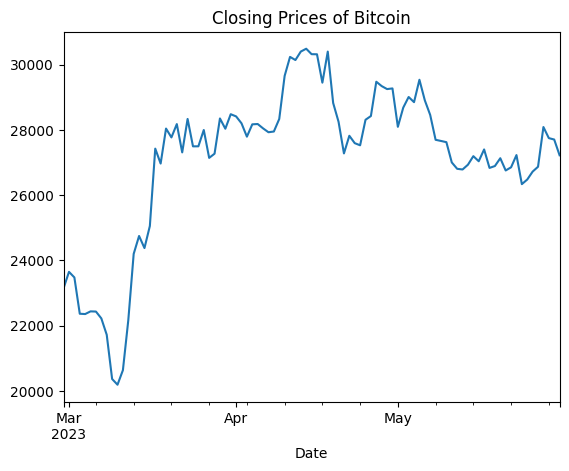

In [9]:
#Plotting the Closing Price
btc['Close'].plot()
plt.title('Closing Prices of Bitcoin')
plt.show()

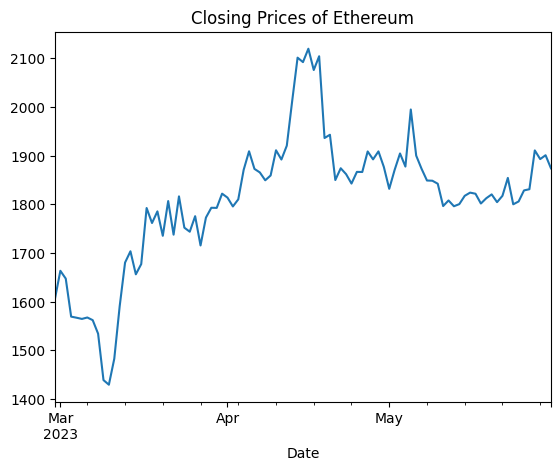

In [10]:
eth['Close'].plot()
plt.title('Closing Prices of Ethereum')
plt.show()

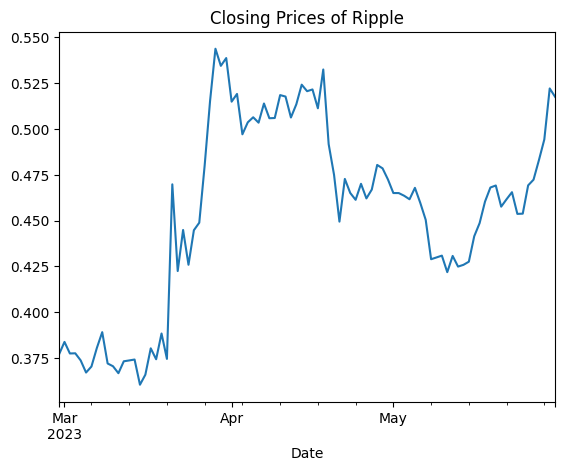

In [11]:
xrp['Close'].plot()
plt.title('Closing Prices of Ripple')
plt.show()

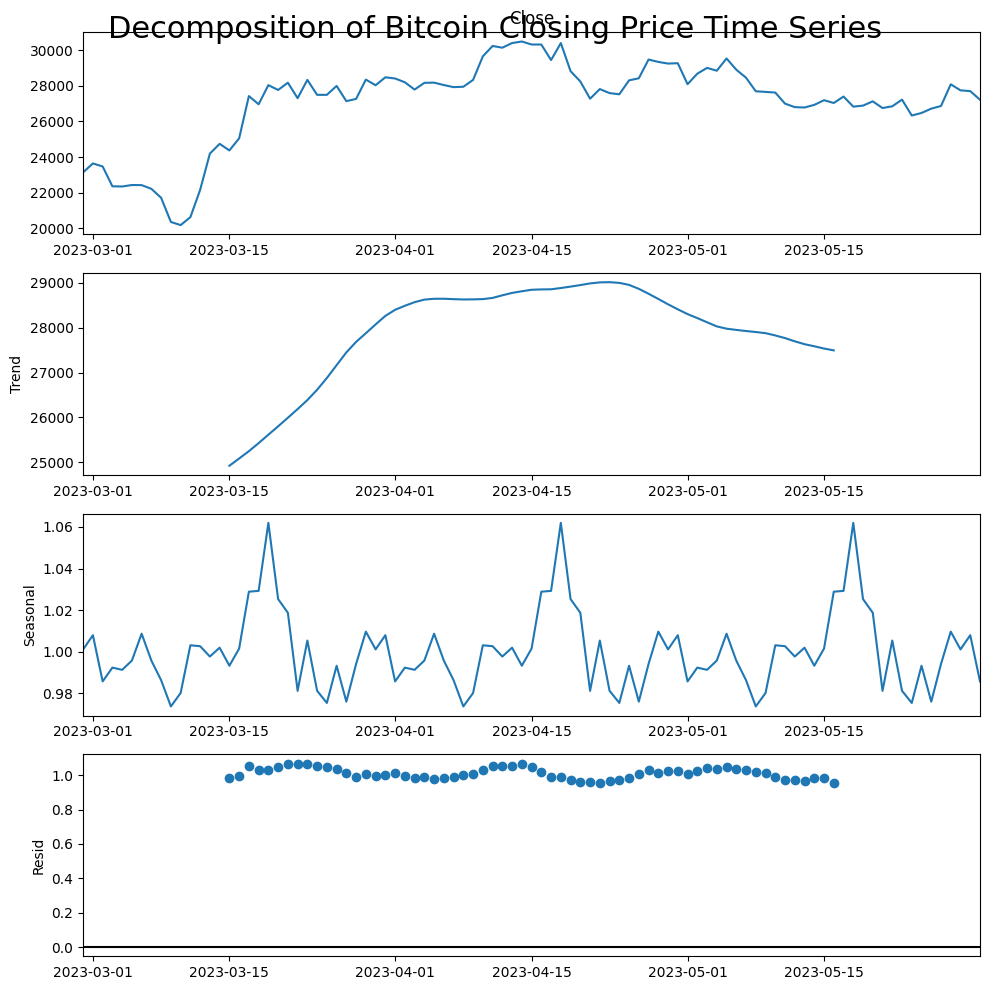

In [12]:
#Decomposition of Time Series
res1 = seasonal_decompose(btc['Close'], model='multiplicative', period=30)
plt.rcParams.update({'figure.figsize': (10,10)})
res1.plot().suptitle('Decomposition of Bitcoin Closing Price Time Series', fontsize=22)
plt.show()

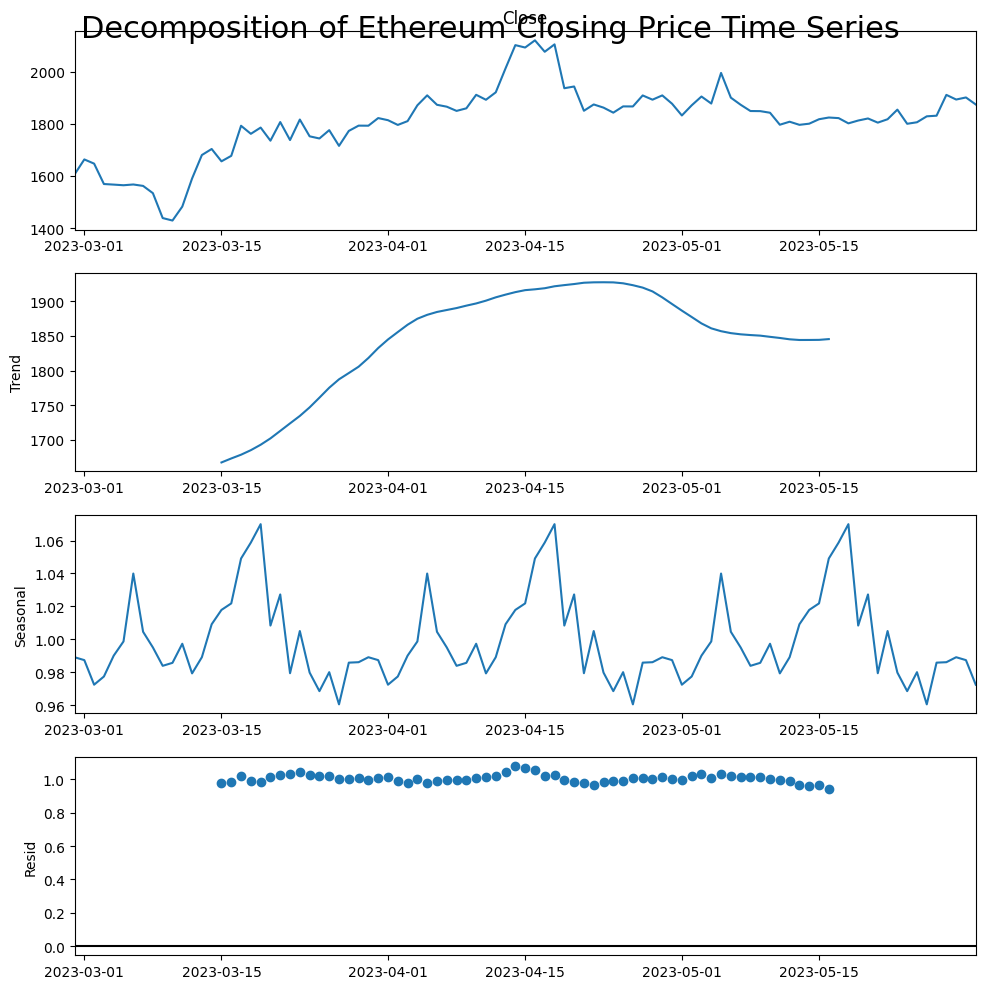

In [13]:
res2 = seasonal_decompose(eth['Close'], model='multiplicative', period=30)
plt.rcParams.update({'figure.figsize': (10,10)})
res2.plot().suptitle('Decomposition of Ethereum Closing Price Time Series', fontsize=22)
plt.show()

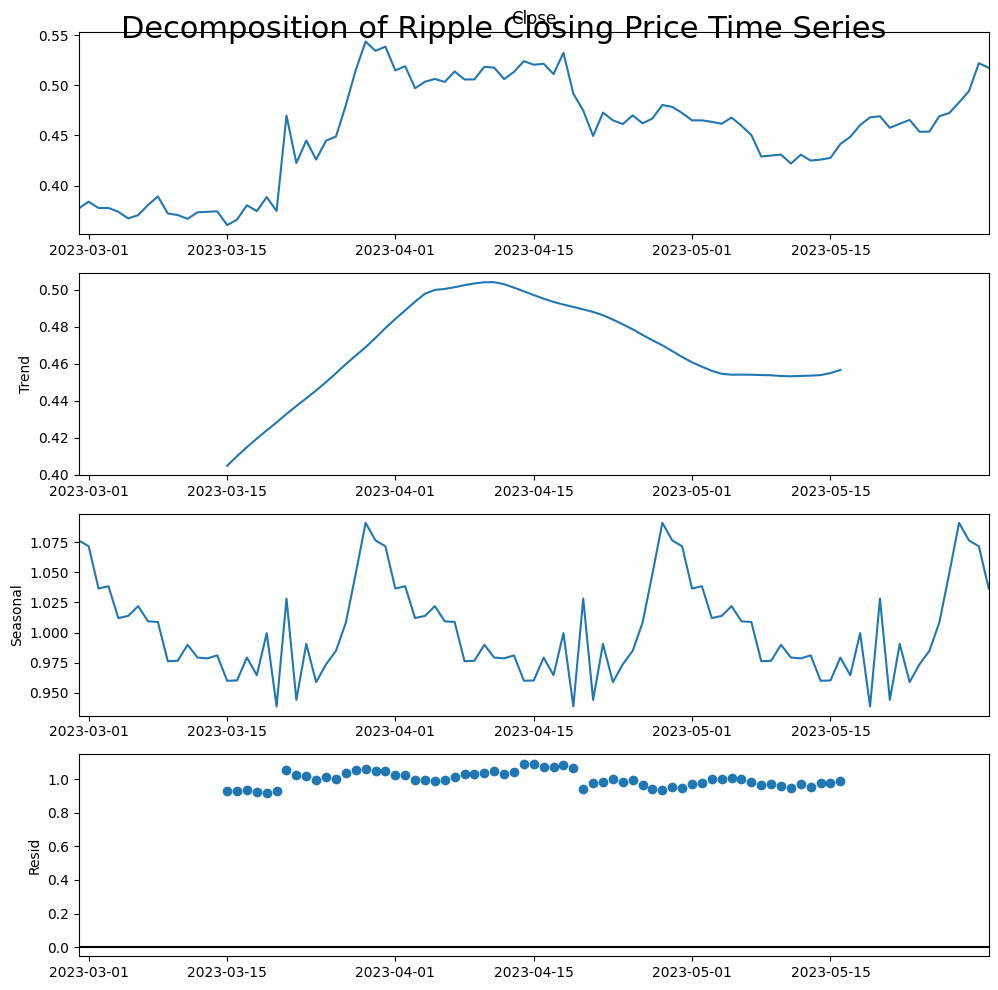

In [14]:
res3 = seasonal_decompose(xrp['Close'], model='multiplicative', period=30)
plt.rcParams.update({'figure.figsize': (10,10)})
res3.plot().suptitle('Decomposition of Ripple Closing Price Time Series', fontsize=22)
plt.show()

In [15]:
#Calculating Log Returns
btc['log_return'] = np.log(btc['Close'] / btc['Close'].shift(1))
btc = btc.dropna()

eth['log_return'] = np.log(eth['Close'] / eth['Close'].shift(1))
eth = eth.dropna()

xrp['log_return'] = np.log(xrp['Close'] / xrp['Close'].shift(1))
xrp = xrp.dropna()

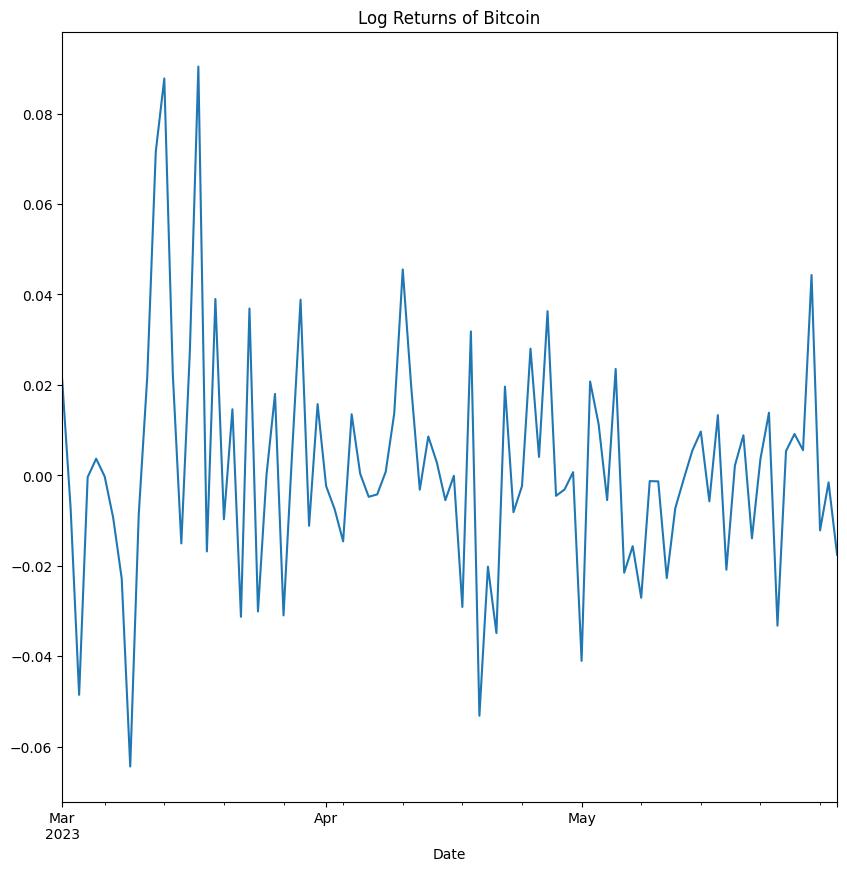

In [16]:
#Plotting the Log Returns
btc['log_return'].plot()
plt.title('Log Returns of Bitcoin')
plt.show()

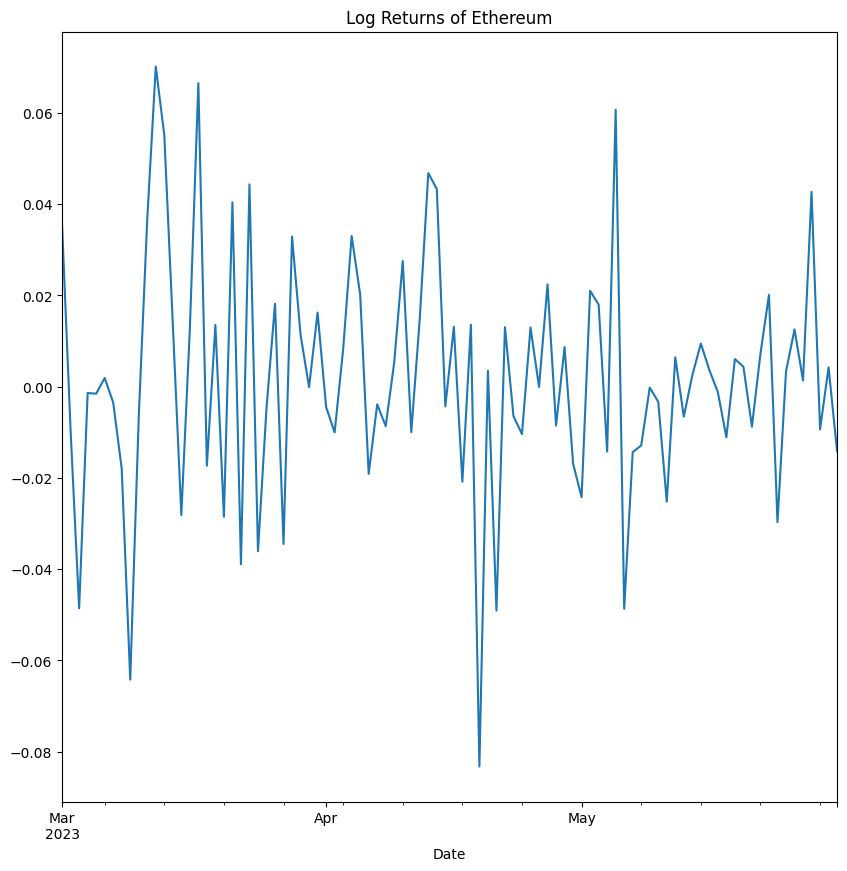

In [17]:
eth['log_return'].plot()
plt.title('Log Returns of Ethereum')
plt.show()

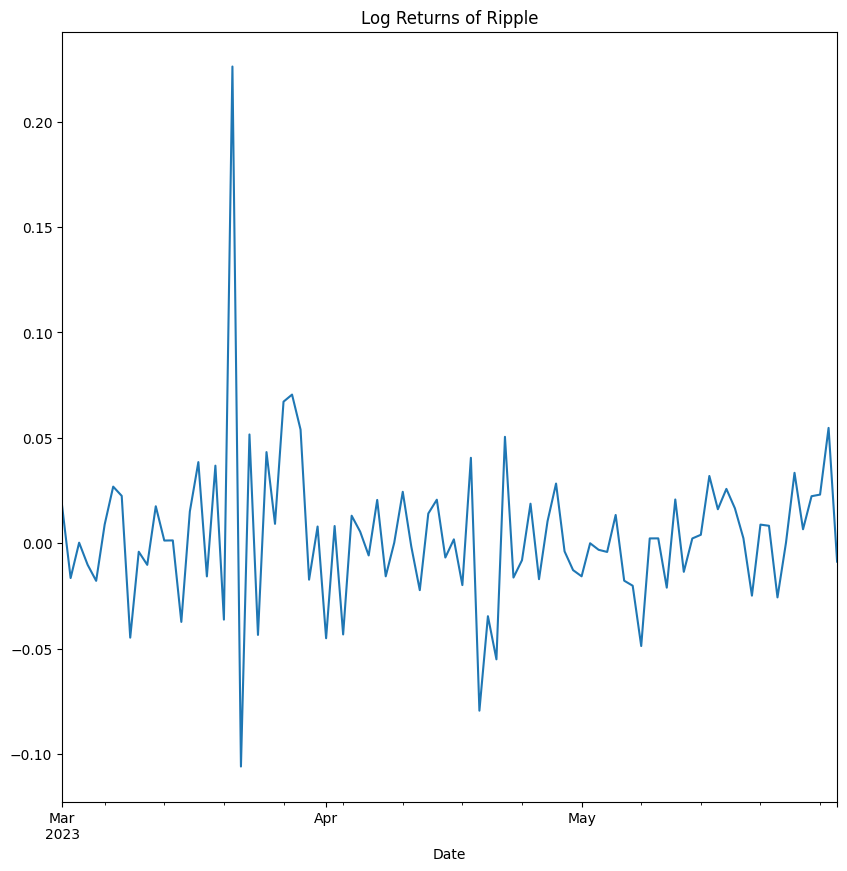

In [18]:
xrp['log_return'].plot()
plt.title('Log Returns of Ripple')
plt.show()

In [19]:
#Summary Statistics of the Returns
print(btc['log_return'].describe())

count    92.000000
mean      0.001762
std       0.025871
min      -0.064425
25%      -0.011420
50%      -0.000337
75%       0.013730
max       0.090431
Name: log_return, dtype: float64


In [20]:
print(eth['log_return'].describe())

count    92.000000
mean      0.001679
std       0.026751
min      -0.083263
25%      -0.010594
50%       0.000613
75%       0.013580
max       0.070110
Name: log_return, dtype: float64


In [21]:
print(xrp['log_return'].describe())

count    92.000000
mean      0.003436
std       0.037612
min      -0.105973
25%      -0.015899
50%       0.002035
75%       0.019181
max       0.226182
Name: log_return, dtype: float64


In [22]:
#Mean of the log returns
mean_return = btc['log_return'].mean()
print('Mean return of btc:', mean_return)
mean_return = eth['log_return'].mean()
print('Mean return of eth:', mean_return)
mean_return = xrp['log_return'].mean()
print('Mean return of xrp:', mean_return)

Mean return of btc: 0.0017615107097610292
Mean return of eth: 0.0016789510124597805
Mean return of xrp: 0.0034363724365282762


In [23]:
#Trimmed mean of the log returns
trimmed_mean = stats.trim_mean(btc['log_return'], 0.1)
print('10% trimmed mean of btc:', trimmed_mean)
trimmed_mean = stats.trim_mean(eth['log_return'], 0.1)
print('10% trimmed mean of eth:', trimmed_mean)
trimmed_mean = stats.trim_mean(xrp['log_return'], 0.1)
print('10% trimmed mean of xrp:', trimmed_mean)

10% trimmed mean of btc: 0.0005291718528411396
10% trimmed mean of eth: 0.0015948836262663405
10% trimmed mean of xrp: 0.0021804062677947262


In [24]:
# Weighted mean of log returns
weights = np.repeat(1/len(btc['log_return']), len(btc['log_return']))
weighted_mean = np.average(btc['log_return'], weights=weights)
print('Weighted mean of btc:', weighted_mean)
weights = np.repeat(1/len(eth['log_return']), len(eth['log_return']))
weighted_mean = np.average(eth['log_return'], weights=weights)
print('Weighted mean of eth:', weighted_mean)
weights = np.repeat(1/len(xrp['log_return']), len(xrp['log_return']))
weighted_mean = np.average(xrp['log_return'], weights=weights)
print('Weighted mean of xrp:', weighted_mean)

Weighted mean of btc: 0.001761510709761029
Weighted mean of eth: 0.0016789510124597807
Weighted mean of xrp: 0.003436372436528276


In [25]:
# Median of the log returns
median_return = btc['log_return'].median()
print('Median return of btc:', median_return)
median_return = eth['log_return'].median()
print('Median return of eth:', median_return)
median_return = xrp['log_return'].median()
print('Median return of xrp:', median_return)

Median return of btc: -0.0003369438501556081
Median return of eth: 0.0006128371991880663
Median return of xrp: 0.002034796142807746


In [26]:
# Mean absolute deviation
mean_abs_dev = btc['log_return'].mad()
print('Mean absolute deviation of btc:', mean_abs_dev)
mean_abs_dev = eth['log_return'].mad()
print('Mean absolute deviation of eth:', mean_abs_dev)
mean_abs_dev = xrp['log_return'].mad()
print('Mean absolute deviation of xrp:', mean_abs_dev)

Mean absolute deviation of btc: 0.018351601950092014
Mean absolute deviation of eth: 0.0195770309303901
Mean absolute deviation of xrp: 0.02411483912995719


<ipython-input-26-d02a21447c0c>:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean_abs_dev = btc['log_return'].mad()
<ipython-input-26-d02a21447c0c>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean_abs_dev = eth['log_return'].mad()
<ipython-input-26-d02a21447c0c>:6: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean_abs_dev = xrp['log_return'].mad()


In [27]:
# Variance of the log returns
var_return = btc['log_return'].var()
print('Variance of btc:', var_return)
var_return = eth['log_return'].var()
print('Variance of eth:', var_return)
var_return = xrp['log_return'].var()
print('Variance of xrp:', var_return)

Variance of btc: 0.0006693246523509171
Variance of eth: 0.0007155993263087783
Variance of xrp: 0.0014146757259375978


In [28]:
# Standard deviation of the log returns
std_return = btc['log_return'].std()
print('Standard deviation of btc:', std_return)
std_return = eth['log_return'].std()
print('Standard deviation of eth:', std_return)
std_return = xrp['log_return'].std()
print('Standard deviation of xrp:', std_return)

Standard deviation of btc: 0.025871309444071768
Standard deviation of eth: 0.02675068833336403
Standard deviation of xrp: 0.037612175235388845


In [29]:
# Median absolute deviation
med_abs_dev = btc['log_return'].mad()
print('Median absolute deviation of btc:', med_abs_dev)
med_abs_dev = eth['log_return'].mad()
print('Median absolute deviation of eth:', med_abs_dev)
med_abs_dev = xrp['log_return'].mad()
print('Median absolute deviation of xrp:', med_abs_dev)

Median absolute deviation of btc: 0.018351601950092014
Median absolute deviation of eth: 0.0195770309303901
Median absolute deviation of xrp: 0.02411483912995719


<ipython-input-29-e410ecfc1358>:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  med_abs_dev = btc['log_return'].mad()
<ipython-input-29-e410ecfc1358>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  med_abs_dev = eth['log_return'].mad()
<ipython-input-29-e410ecfc1358>:6: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  med_abs_dev = xrp['log_return'].mad()


In [30]:
#Quantiles
quantiles = btc['log_return'].quantile([0.25, 0.5, 0.75])
print('Quantiles of btc:\n', quantiles)
quantiles = eth['log_return'].quantile([0.25, 0.5, 0.75])
print('Quantiles of eth:\n', quantiles)
quantiles = xrp['log_return'].quantile([0.25, 0.5, 0.75])
print('Quantiles of xrp:\n', quantiles)

Quantiles of btc:
 0.25   -0.011420
0.50   -0.000337
0.75    0.013730
Name: log_return, dtype: float64
Quantiles of eth:
 0.25   -0.010594
0.50    0.000613
0.75    0.013580
Name: log_return, dtype: float64
Quantiles of xrp:
 0.25   -0.015899
0.50    0.002035
0.75    0.019181
Name: log_return, dtype: float64


In [31]:
#5th and 95th percentiles
fifth_ninetyfifth_percentiles = btc['log_return'].quantile([0.05, 0.95])
print('5th and 95th percentiles of btc:\n', fifth_ninetyfifth_percentiles)
fifth_ninetyfifth_percentiles = eth['log_return'].quantile([0.05, 0.95])
print('5th and 95th percentiles of eth:\n', fifth_ninetyfifth_percentiles)
fifth_ninetyfifth_percentiles = xrp['log_return'].quantile([0.05, 0.95])
print('5th and 95th percentiles of xrp:\n', fifth_ninetyfifth_percentiles)

5th and 95th percentiles of btc:
 0.05   -0.034009
0.95    0.041396
Name: log_return, dtype: float64
5th and 95th percentiles of eth:
 0.05   -0.043302
0.95    0.045402
Name: log_return, dtype: float64
5th and 95th percentiles of xrp:
 0.05   -0.044950
0.95    0.052629
Name: log_return, dtype: float64


In [32]:
#Interquartile range
iqr = btc['log_return'].quantile(0.75) - btc['log_return'].quantile(0.25)
print('Interquartile range of btc:', iqr)
iqr = eth['log_return'].quantile(0.75) - eth['log_return'].quantile(0.25)
print('Interquartile range of eth:', iqr)
iqr = xrp['log_return'].quantile(0.75) - xrp['log_return'].quantile(0.25)
print('Interquartile range of xrp:', iqr)

Interquartile range of btc: 0.025150237140370915
Interquartile range of eth: 0.024173502697510313
Interquartile range of xrp: 0.03507971490753793


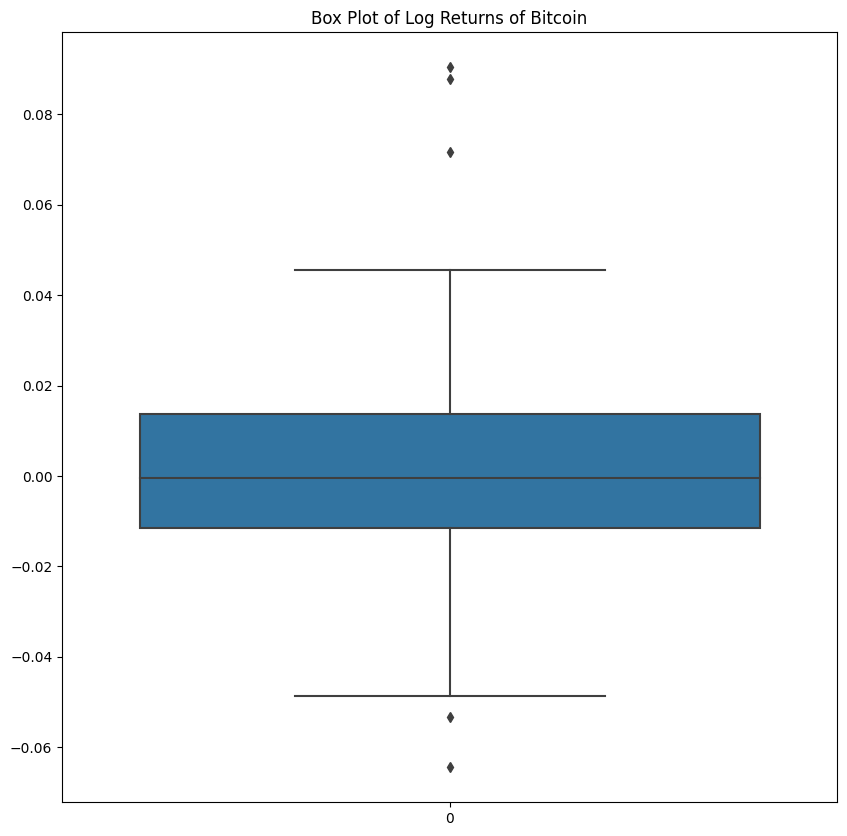

In [33]:
#Creating a Box Plot of the Log Returns
sns.boxplot(btc['log_return'].dropna())
plt.title('Box Plot of Log Returns of Bitcoin')
plt.show()

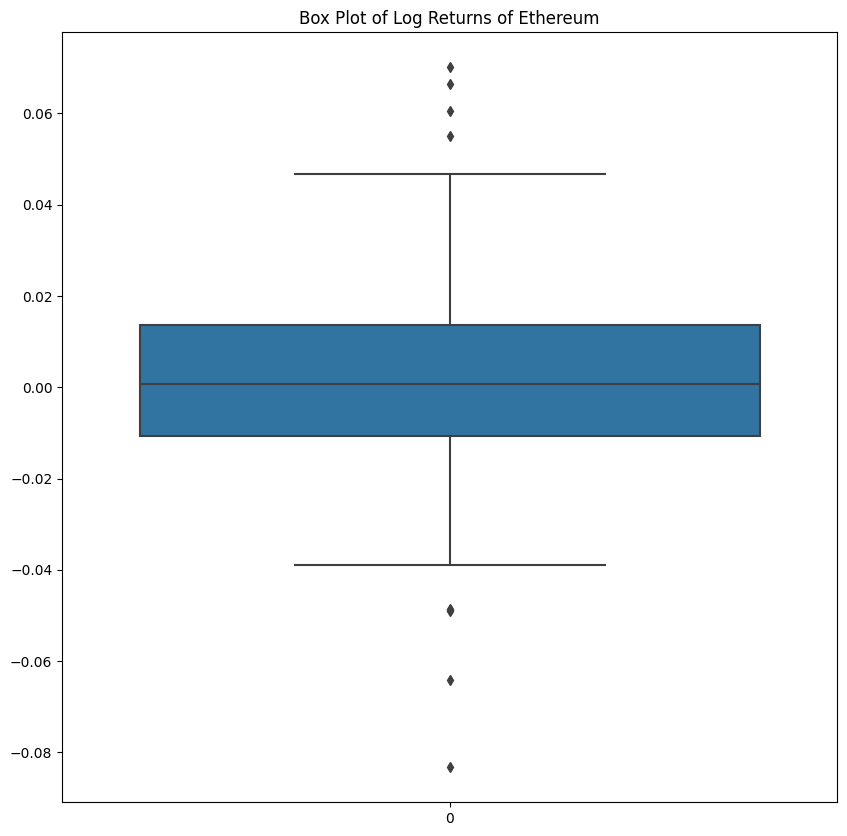

In [34]:
# Creating a Box Plot of the Log Returns
sns.boxplot(eth['log_return'].dropna())
plt.title('Box Plot of Log Returns of Ethereum')
plt.show()

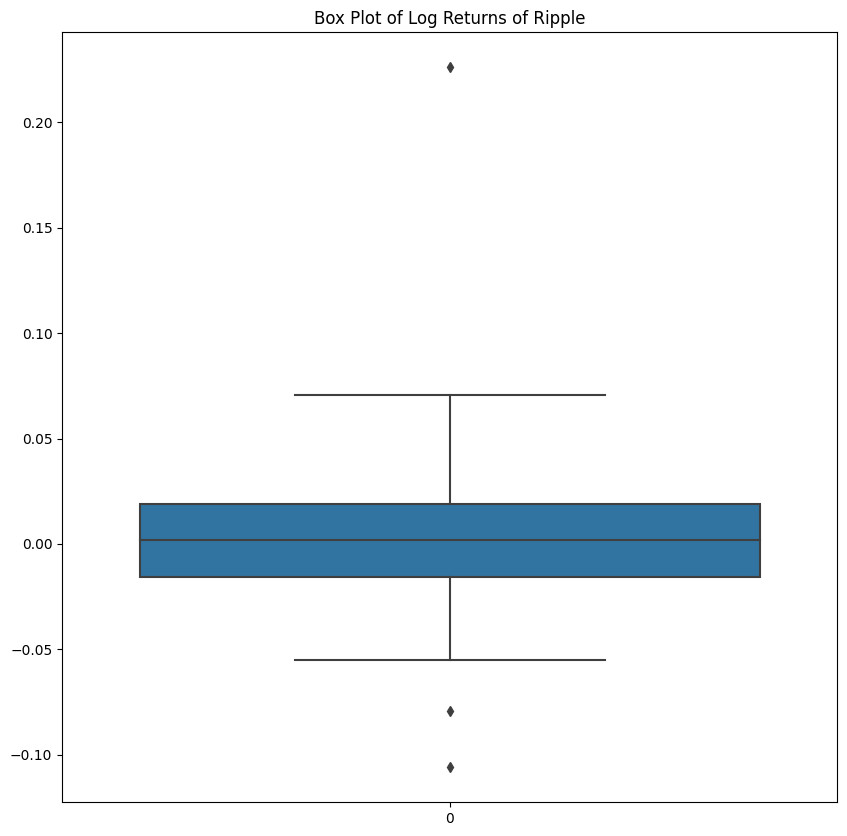

In [35]:
sns.boxplot(xrp['log_return'].dropna())
plt.title('Box Plot of Log Returns of Ripple')
plt.show()

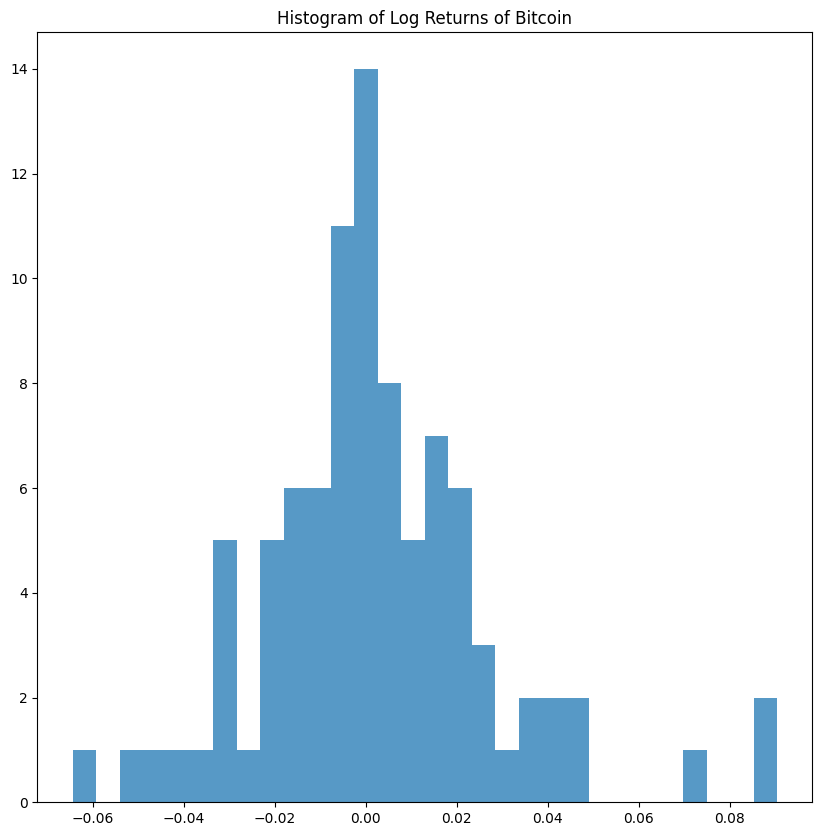

In [36]:
#Plotting a Histogram of the Log Returns
plt.hist(btc['log_return'].dropna(), bins=30, alpha=0.75)
plt.title('Histogram of Log Returns of Bitcoin')
plt.show()

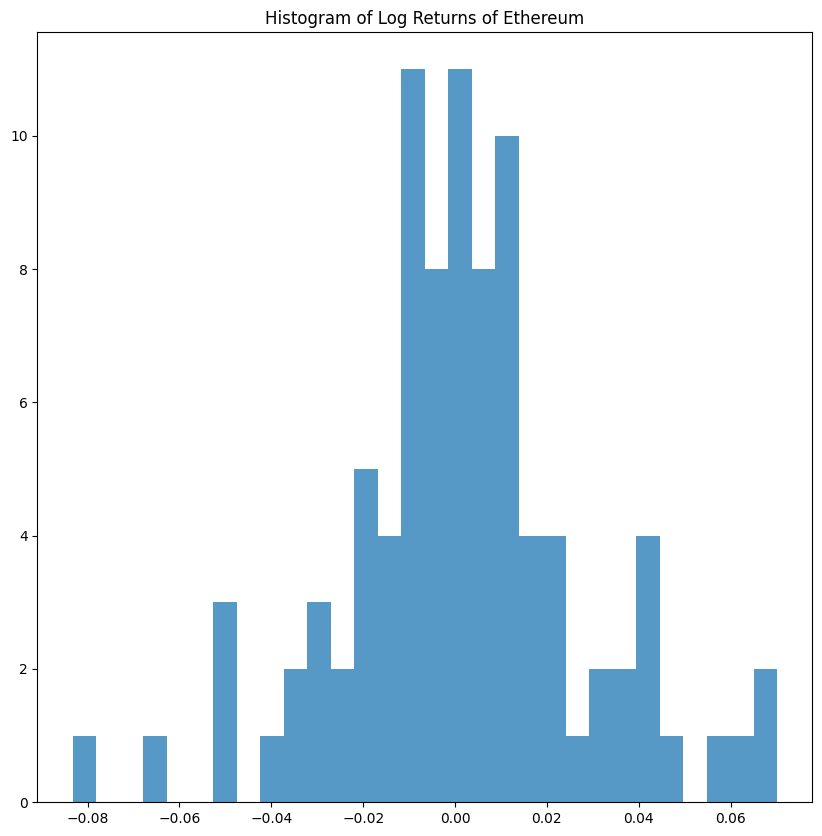

In [37]:
plt.hist(eth['log_return'].dropna(), bins=30, alpha=0.75)
plt.title('Histogram of Log Returns of Ethereum')
plt.show()

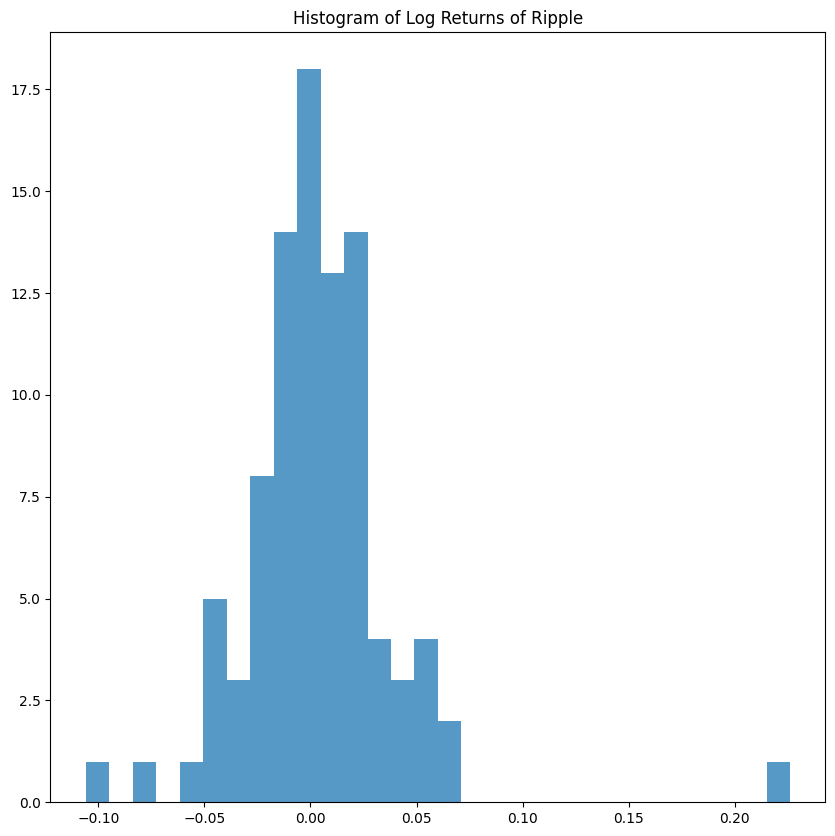

In [38]:
plt.hist(xrp['log_return'].dropna(), bins=30, alpha=0.75)
plt.title('Histogram of Log Returns of Ripple')
plt.show()

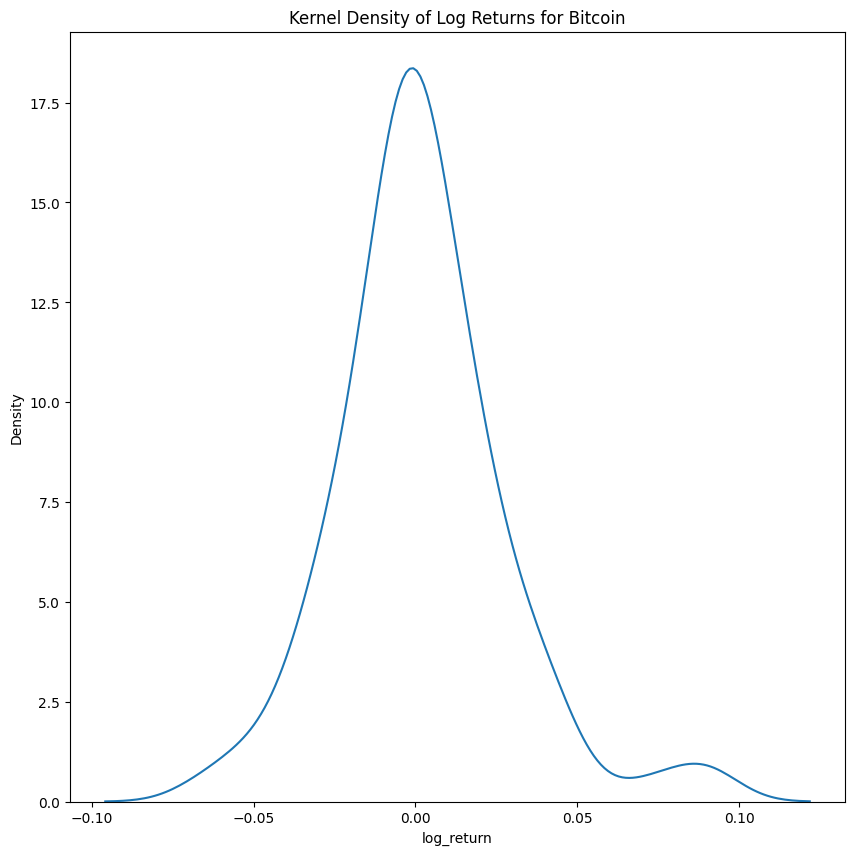

In [39]:
#Plot Kernel Density
sns.kdeplot(btc['log_return'])
plt.title('Kernel Density of Log Returns for Bitcoin')
plt.show()

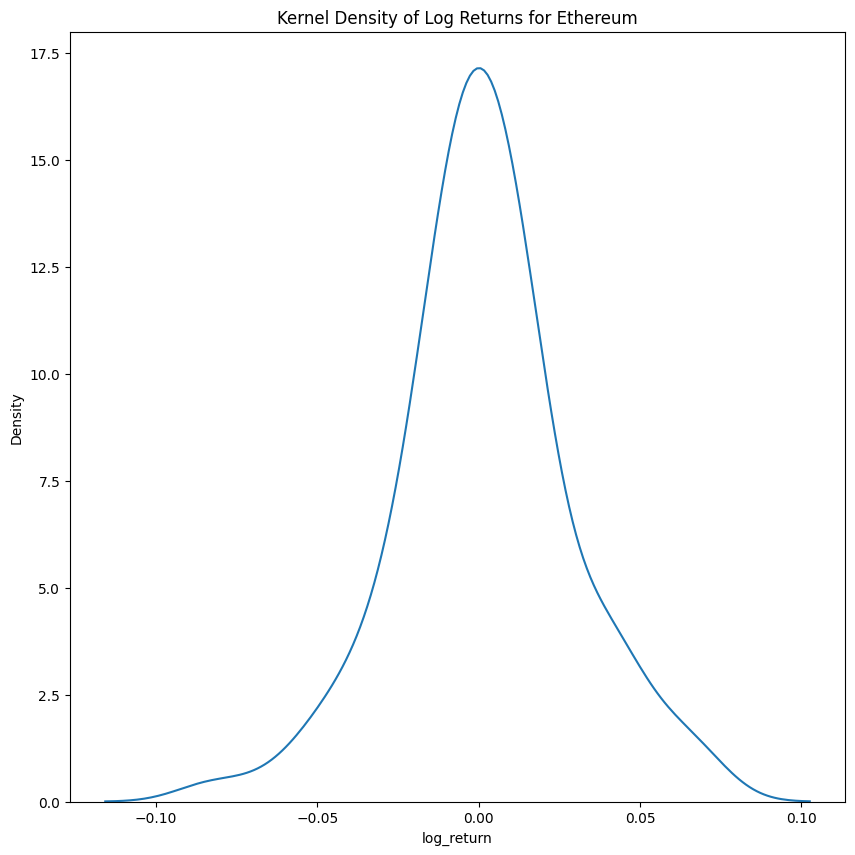

In [40]:
sns.kdeplot(eth['log_return'])
plt.title('Kernel Density of Log Returns for Ethereum')
plt.show()

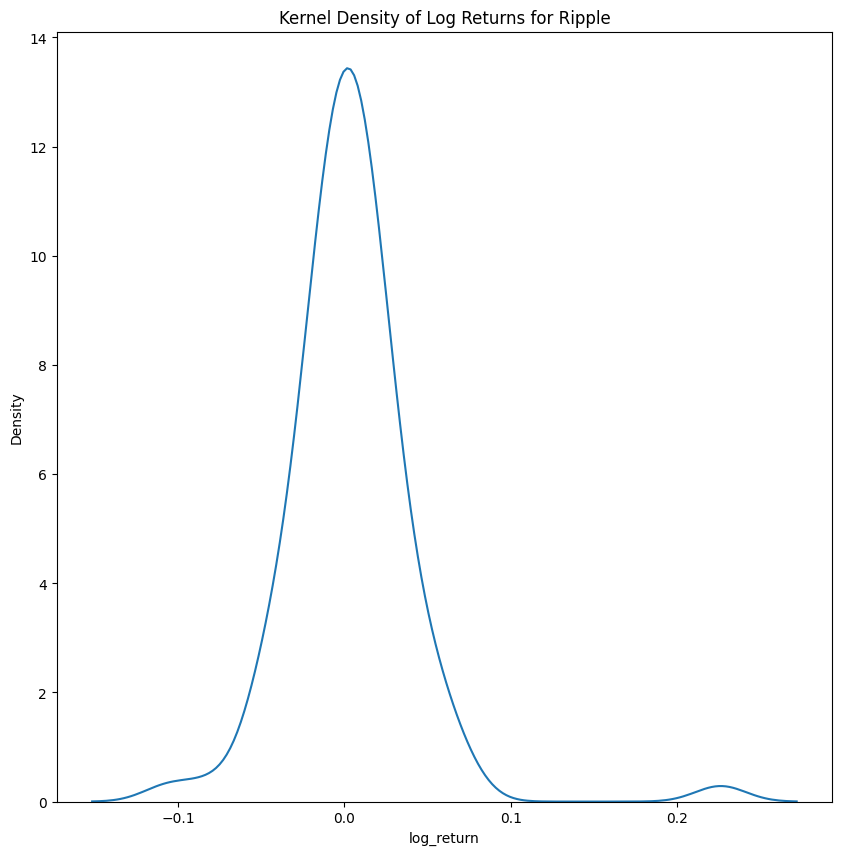

In [41]:
sns.kdeplot(xrp['log_return'])
plt.title('Kernel Density of Log Returns for Ripple')
plt.show()

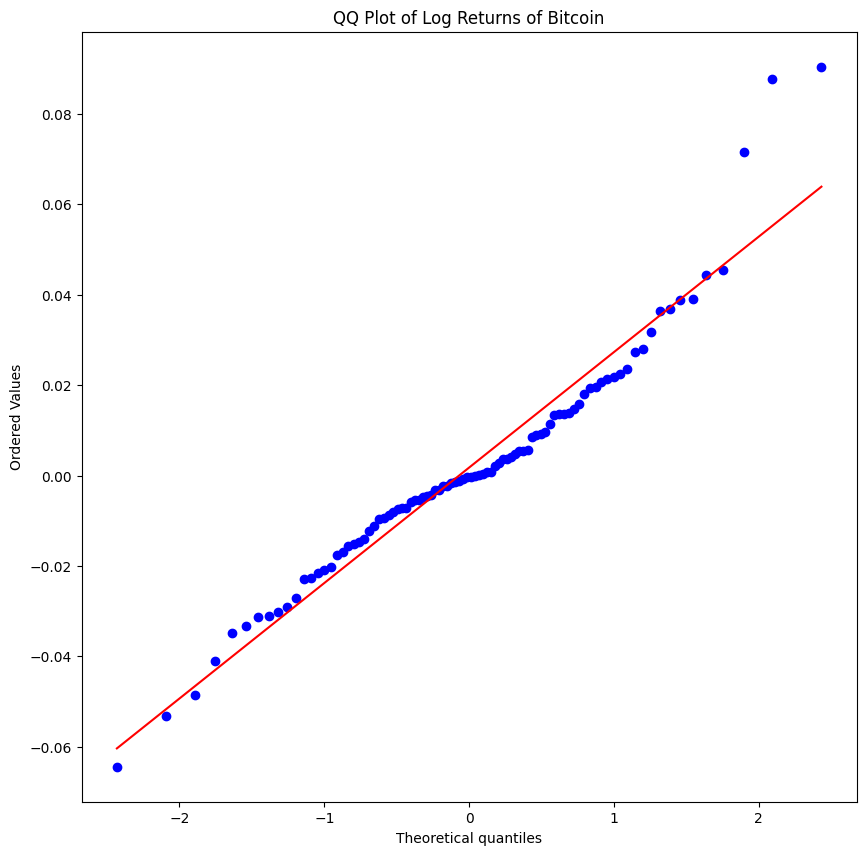

In [42]:
#Creating a QQ Plot of the Log Returns
probplot(btc['log_return'].dropna(), plot=plt)
plt.title('QQ Plot of Log Returns of Bitcoin')
plt.show()

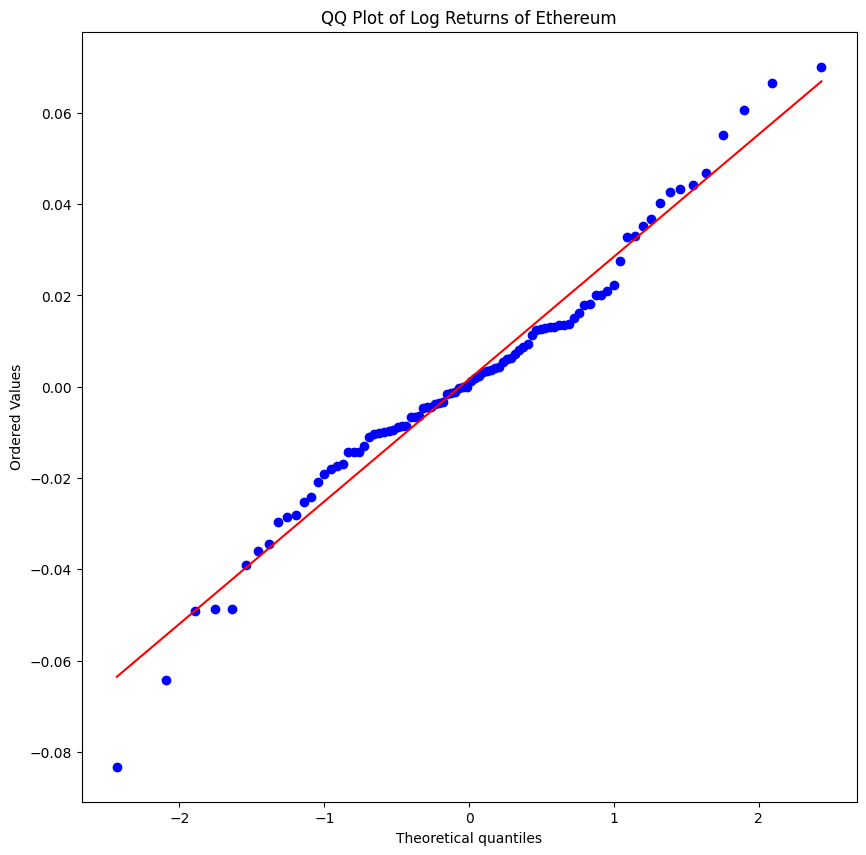

In [43]:
probplot(eth['log_return'].dropna(), plot=plt)
plt.title('QQ Plot of Log Returns of Ethereum')
plt.show()

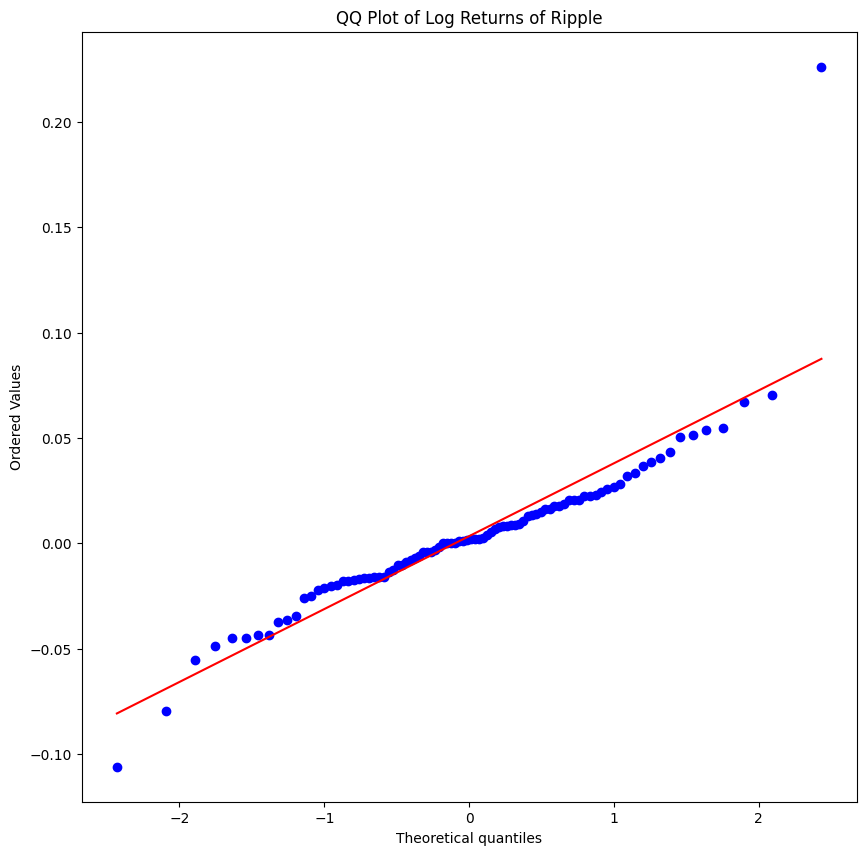

In [44]:
probplot(xrp['log_return'].dropna(), plot=plt)
plt.title('QQ Plot of Log Returns of Ripple')
plt.show()

In [45]:
# Test for normality
_, p_value = stats.shapiro(btc['log_return'])
print('P-value from the Shapiro-Wilk test:', p_value)

P-value from the Shapiro-Wilk test: 0.0015466931508854032


In [46]:
_, p_value = stats.shapiro(eth['log_return'])
print('P-value from the Shapiro-Wilk test for Ethereum:', p_value)

P-value from the Shapiro-Wilk test for Ethereum: 0.10565001517534256


In [47]:
_, p_value = stats.shapiro(xrp['log_return'])
print('P-value from the Shapiro-Wilk test for Ripple:', p_value)

P-value from the Shapiro-Wilk test for Ripple: 1.4689132576961583e-08


In [48]:
# Skewness
btc_skewness = skew(btc['log_return'])
print('Bitcoin Skewness:', btc_skewness)

Bitcoin Skewness: 0.7232010172879855


In [49]:
eth_skewness = skew(eth['log_return'])
print('Ethereum Skewness:', eth_skewness)

Ethereum Skewness: -0.0666082142840243


In [50]:
xrp_skewness = skew(xrp['log_return'])
print('Ripple Skewness:', xrp_skewness)

Ripple Skewness: 1.951610046300753


In [51]:
# Kurtosis
btc_kurtosis = kurtosis(btc['log_return'])
print('Bitcoin Kurtosis:', btc_kurtosis)

Bitcoin Kurtosis: 2.1014710287428766


In [52]:
eth_kurtosis = kurtosis(eth['log_return'])
print('Ethereum Kurtosis:', eth_kurtosis)

Ethereum Kurtosis: 0.9698090147971739


In [53]:
xrp_kurtosis = kurtosis(xrp['log_return'])
print('Ripple Kurtosis:', xrp_kurtosis)

Ripple Kurtosis: 12.404781849792133


In [60]:
# Jarque-Bera Test
jb_test = jarque_bera(btc['log_return'])
print("Bitcoin Jarque-Bera test statistic: ", jb_test.statistic)
print("Bitcoin Jarque-Bera test p-value: ", jb_test.pvalue)

Bitcoin Jarque-Bera test statistic:  24.948327432706087
Bitcoin Jarque-Bera test p-value:  3.824190617468774e-06


In [61]:
jb_test = jarque_bera(eth['log_return'])
print("Ethereum Jarque-Bera test statistic: ", jb_test.statistic)
print("Ethereum Jarque-Bera test p-value: ", jb_test.pvalue)

Ethereum Jarque-Bera test statistic:  3.6733918777521155
Ethereum Jarque-Bera test p-value:  0.15934303643648726


In [62]:
jb_test = jarque_bera(xrp['log_return'])
print("Ripple Jarque-Bera test statistic: ", jb_test.statistic)
print("Ripple Jarque-Bera test p-value: ", jb_test.pvalue)

Ripple Jarque-Bera test statistic:  648.2693360235118
Ripple Jarque-Bera test p-value:  1.6986436852258426e-141


In [72]:
##For Volatility
btc_comp = yf.download('BTC-USD', start='2022-01-01', end='2023-01-01')['Close']
eth_comp = yf.download('ETH-USD', start='2022-01-01', end='2023-01-01')['Close']
xrp_comp = yf.download('XRP-USD', start='2022-01-01', end='2023-01-01')['Close']
sp500 = yf.download('^GSPC', start='2022-01-01', end='2023-01-01')['Close']


btc_returns = btc_comp.pct_change().dropna()
eth_returns = eth_comp.pct_change().dropna()
xrp_returns = xrp_comp.pct_change().dropna()
sp500_returns = sp500.pct_change().dropna()

# Annualized volatility
btc_volatility = np.sqrt(252) * btc_returns.std()
eth_volatility = np.sqrt(252) * eth_returns.std()
xrp_volatility = np.sqrt(252) * xrp_returns.std()
sp500_volatility = np.sqrt(252) * sp500_returns.std()

print(f'Bitcoin Annualized Volatility: {btc_volatility * 100:.2f}%')
print(f'Ethereum Annualized Volatility: {eth_volatility * 100:.2f}%')
print(f'Ripple Annualized Volatility: {xrp_volatility * 100:.2f}%')
print(f'S&P 500 Annualized Volatility: {sp500_volatility * 100:.2f}%')

# Comparison
cryptos = {'Bitcoin': btc_volatility, 'Ethereum': eth_volatility, 'Ripple': xrp_volatility}

for crypto, volatility in cryptos.items():
    if volatility > sp500_volatility:
        print(f"{crypto} is more volatile than the S&P 500.")
    else:
        print(f"{crypto} is less volatile than the S&P 500.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Bitcoin Annualized Volatility: 52.80%
Ethereum Annualized Volatility: 71.85%
Ripple Annualized Volatility: 70.83%
S&P 500 Annualized Volatility: 24.21%
Bitcoin is more volatile than the S&P 500.
Ethereum is more volatile than the S&P 500.
Ripple is more volatile than the S&P 500.


In [73]:
#Volatility using GARCH
returns = btc['Close'].pct_change().dropna()
model = arch_model(returns, vol='Garch', p=1, q=1)
model_fit = model.fit()
print(model_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 10865873.962264067
Iteration:      2,   Func. Count:     16,   Neg. LLF: 9884583.577729417
Iteration:      3,   Func. Count:     26,   Neg. LLF: 413977260936151.8


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006812. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      4,   Func. Count:     36,   Neg. LLF: 161949492536117.7
Iteration:      5,   Func. Count:     46,   Neg. LLF: 6587698.994078615
Iteration:      6,   Func. Count:     53,   Neg. LLF: -21.356145338436928
Iteration:      7,   Func. Count:     61,   Neg. LLF: -160.84617324879335
Iteration:      8,   Func. Count:     68,   Neg. LLF: -57.52407572098289
Iteration:      9,   Func. Count:     75,   Neg. LLF: -207.43469869225189
Iteration:     10,   Func. Count:     81,   Neg. LLF: -199.55608225335772
Iteration:     11,   Func. Count:     87,   Neg. LLF: -207.1575075279962
Iteration:     12,   Func. Count:     94,   Neg. LLF: -207.6431636062636
Iteration:     13,   Func. Count:    100,   Neg. LLF: -208.80801063136107
Iteration:     14,   Func. Count:    106,   Neg. LLF: -208.75984317939157
Iteration:     15,   Func. Count:    112,   Neg. LLF: -208.81335926454716
Iteration:     16,   Func. Count:    118,   Neg. LLF: -208.813398834491
Optimization terminated successfully    (Exit m

In [74]:
#Volatility using GARCH
returns = eth['Close'].pct_change().dropna()
model = arch_model(returns, vol='Garch', p=1, q=1)
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007051. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 119817468209627.81
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1209.4767784326843
Iteration:      3,   Func. Count:     23,   Neg. LLF: -201.0418521390063
Iteration:      4,   Func. Count:     31,   Neg. LLF: -185.10369353698943
Iteration:      5,   Func. Count:     39,   Neg. LLF: -198.58530326125205
Iteration:      6,   Func. Count:     46,   Neg. LLF: -202.59065456395112
Iteration:      7,   Func. Count:     52,   Neg. LLF: -202.6034173739919
Iteration:      8,   Func. Count:     57,   Neg. LLF: -202.6034194363923
Iteration:      9,   Func. Count:     61,   Neg. LLF: -202.6034194364097
Optimization terminated successfully    (Exit mode 0)
            Current function value: -202.6034194363923
            Iterations: 9
            Function evaluations: 61
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:   

In [75]:
#Volatility using GARCH
returns = xrp['Close'].pct_change().dropna()
model = arch_model(returns, vol='Garch', p=1, q=1)
model_fit = model.fit()
print(model_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 629436.9918247053
Iteration:      2,   Func. Count:     16,   Neg. LLF: 71.33508163988127
Iteration:      3,   Func. Count:     22,   Neg. LLF: -178.84074083662503
Iteration:      4,   Func. Count:     27,   Neg. LLF: 695.8608034376186


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001545. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      5,   Func. Count:     33,   Neg. LLF: -143.59220310187862
Iteration:      6,   Func. Count:     39,   Neg. LLF: -175.17191864123345
Iteration:      7,   Func. Count:     45,   Neg. LLF: -178.15510813862417
Iteration:      8,   Func. Count:     51,   Neg. LLF: -179.83501149138647
Iteration:      9,   Func. Count:     57,   Neg. LLF: -179.94498601511728
Iteration:     10,   Func. Count:     62,   Neg. LLF: -179.9450249661274
Iteration:     11,   Func. Count:     67,   Neg. LLF: -179.9450266205671
Iteration:     12,   Func. Count:     71,   Neg. LLF: -179.94502669562354
Optimization terminated successfully    (Exit mode 0)
            Current function value: -179.9450266205671
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Ad

In [84]:
#Herding Analysis
#for BTC ETH XRP
tickers = ["BTC-USD","ETH-USD","XRP-USD"]
data = yf.download(tickers, start='2022-01-01', end='2023-01-01')['Close']
data.dropna(inplace=True)

returns = np.log(data / data.shift(1)).dropna()
returns

def calculate_csad_and_rm(returns):
    n = returns.shape[1]
    Rm = returns.mean(axis=1)
    temp_dif = np.abs(returns.sub(Rm, axis=0))
    temp_sum = temp_dif.sum(axis=1)
    CSAD = temp_sum / n
    df = pd.DataFrame({'CSAD': CSAD, 'Rm': Rm, 'Rm2': Rm**2})
    return df
herd = calculate_csad_and_rm(returns)

[*********************100%***********************]  3 of 3 completed


In [85]:
# Linear regression model
model = ols("CSAD ~ np.abs(Rm) + Rm2", data=herd).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   CSAD   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     43.95
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           8.25e-18
Time:                        13:23:01   Log-Likelihood:                 1217.1
No. Observations:                 364   AIC:                            -2428.
Df Residuals:                     361   BIC:                            -2417.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0065      0.001      7.876      0.0

In [86]:
# Check the presence of herding
threshold_for_herding = -0.2
if model.params['Rm2'] < threshold_for_herding:
    print("The highly negative coefficient for Rm2 indicates the presence of herding.")
else:
    print("No clear indication of herding.")

The highly negative coefficient for Rm2 indicates the presence of herding.


In [79]:
#Percentage of Entire Market
# CoinGecko API URLs
url_market = "https://api.coingecko.com/api/v3/global"
url_bitcoin = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=max"
url_ethereum = "https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=max"
url_ripple = "https://api.coingecko.com/api/v3/coins/ripple/market_chart?vs_currency=usd&days=max"

# Overall market data
data_market = requests.get(url_market).json()
total_market_cap = data_market['data']['total_market_cap']['usd']

# Bitcoin data
data_bitcoin = requests.get(url_bitcoin).json()
bitcoin_market_cap = data_bitcoin['market_caps'][-1][1]

# Ethereum data
data_ethereum = requests.get(url_ethereum).json()
ethereum_market_cap = data_ethereum['market_caps'][-1][1]

# Ripple data
data_ripple = requests.get(url_ripple).json()
ripple_market_cap = data_ripple['market_caps'][-1][1]

# Market cap as a percentage of the total market cap
btc_percentage = (bitcoin_market_cap / total_market_cap) * 100
eth_percentage = (ethereum_market_cap / total_market_cap) * 100
xrp_percentage = (ripple_market_cap / total_market_cap) * 100

print(f"Bitcoin's market cap is {btc_percentage}% of the total cryptocurrency market cap.")
print(f"Ethereum's market cap is {eth_percentage}% of the total cryptocurrency market cap.")
print(f"Ripple's market cap is {xrp_percentage}% of the total cryptocurrency market cap.")


Bitcoin's market cap is 48.76867175314088% of the total cryptocurrency market cap.
Ethereum's market cap is 18.610175175942224% of the total cryptocurrency market cap.
Ripple's market cap is 2.0830669477343573% of the total cryptocurrency market cap.
